In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
#import the CSV from Wyscout
df = pd.read_excel('UWCL.xlsx')

In [3]:
#because you are only looking at percentile rank for the data metrics you need to drop a few columns.
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df = df.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played',],axis=1).reset_index()

In [4]:
#Create a parameter list
params = list(df.columns)
params

params = params[2:]
params

player = df.loc[df['Player']=='Alexia Putellas'].reset_index()
player = list(player.loc[0])
print(player)

df.Player.values

[9, 9, 'Alexia Putellas', 56.82, 63.64, 0.18, 5.0, 1.07, 0.66, 0.19, 1.55, 6.21, 1.55, 0.35, 2.52, 1.55, 10.39, 6.5, 2.82]


array(['A. Henry', 'L. Lattwein', 'S. Huth', 'C. Macário', 'S. Bacha',
       'K. Little', 'J. Roord', 'T. Waßmuth', 'M. Rosucci',
       'Alexia Putellas', 'J. Feldkamp', 'L. Oberdorf', 'Jade Boho',
       'D. Cascarino', 'O. Geyoro', 'A. Albertsdóttir', 'F. Maanum',
       'D. Apanashchenko', 'Aitana Bonmati', 'Pauleta', 'M. Malard',
       'K. Diani', 'J. Brand', 'K. Tómasdóttir', 'S. Maendly',
       'L. Hurtig', 'S. Junge Pedersen', 'S. Kumagai', 'Y. Shevchuk',
       'B. Bonansea', 'B. Mead', 'T. Ziemer', 'F. Curmark',
       'Athenea del Castillo', 'C. Hansen', 'E. Rubensson', 'K. Carusa',
       'J. Rytting-Kaneryd', 'N. Padilla-Bidas', 'S. Baltimore',
       'A. Petryk', 'Selma Magnúsdóttir', 'E. Færge', 'O. Boichenko',
       'Claudia Zornoza', 'Lucía Rodríguez', 'Jennifer Hermoso',
       'H. Antonsdóttir', 'F. Dongus', 'C. Fløe', 'Patricia Guijarro',
       'Kika Nazareth', 'P. Morroni', 'M. Pokorny', 'B. Sadikoğlu',
       'V. Cernoia', 'S. Larsen', 'T. Hurni', 'A. Caruso'

In [5]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

16
19 None
16
16 None


In [6]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    
round(stats.percentileofscore(df[params[0]],player[0]))

for n,i in enumerate(values):
    if i == 100:
        values[n] = 99
        
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="white",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [7]:
# color for the slices and tex
slice_colors = ["#008000"] * 4 + ["#FF9300"] * 7     + ["#D70232"] * 5
text_colors = ["#000000"] * 8 + ["white"] * 5

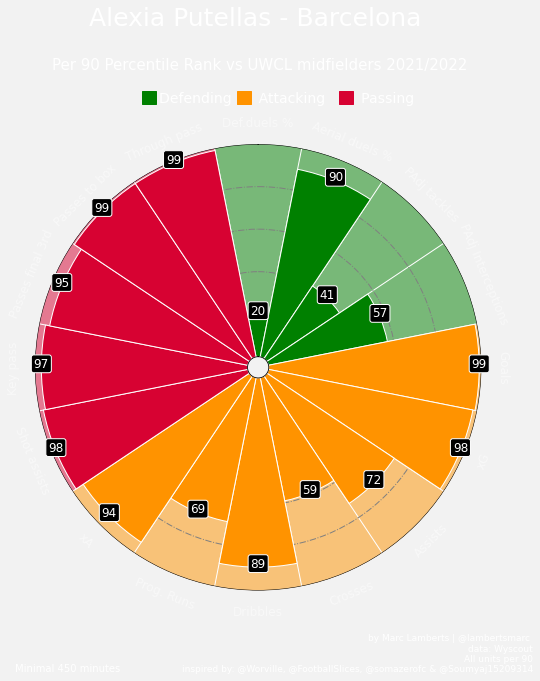

In [8]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8.5),      # adjust figsize according to your need
    param_location=110,# where the parameters will be added
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict( 
        edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="white", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="#000000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Alexia Putellas - Barcelona \n\n", size=25,
    ha="center", color="white"
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Per 90 Percentile Rank vs UWCL midfielders 2021/2022\n\n",
    size=15,
    ha="center", color="white"
)

fig.text(
    0.09, 0.005, f"Minimal 450 minutes", color="white")

# add credits
notes = '@lambertsmarc'
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Wyscout\nAll units per 90"
CREDIT_2 = '@lambertsmarc'
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="white",
    ha="right"
)


# add text
fig.text(
    0.34, 0.935, "Defending      Attacking        Passing                ", size=14,color="white"
)

 #add rectangles
fig.patches.extend([
    plt.Rectangle(
       (0.31, 0.9325), 0.025, 0.021, fill=True, color="#008000",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.9325), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.652, 0.9325), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])


plt.savefig('Alexia Putellas.png',dpi=750,bbox_inches = 'tight', facecolor='#000000')

